In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7b7828bcf35f03b0fa7cdf0efdfdec9


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | andreapol
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | sao francisco de assis
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | pulandian
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | manggar
Processing Record 13 of Set 1 | maloy
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | silifke
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | airai
Proce

Processing Record 37 of Set 4 | barrow
Processing Record 38 of Set 4 | northam
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | huarmey
Processing Record 41 of Set 4 | chumikan
Processing Record 42 of Set 4 | tommot
Processing Record 43 of Set 4 | srandakan
Processing Record 44 of Set 4 | san vicente
Processing Record 45 of Set 4 | kamenka
Processing Record 46 of Set 4 | acarau
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | rio gallegos
Processing Record 50 of Set 4 | mechanicsville
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | oshnaviyeh
Processing Record 4 of Set 5 | ronneby
Processing Record 5 of Set 5 | bacolod
Processing Record 6 of Set 5 | belyy yar
Processing Record 7 of Set 5 | cap malheureux
Processing Record 8 of Set 5 | severo-kurilsk
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | shenjia

Processing Record 29 of Set 8 | rocha
Processing Record 30 of Set 8 | sao jose da coroa grande
Processing Record 31 of Set 8 | buzmeyin
Processing Record 32 of Set 8 | bargal
City not found. Skipping...
Processing Record 33 of Set 8 | velikiy ustyug
Processing Record 34 of Set 8 | coron
Processing Record 35 of Set 8 | yara
Processing Record 36 of Set 8 | ayagoz
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | ouidah
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | flinders
Processing Record 41 of Set 8 | tupiza
Processing Record 42 of Set 8 | villazon
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | berlevag
Processing Record 45 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 46 of Set 8 | khatanga
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | la ronge
Processing Record 49 of Set 8 | mastic beach
Processing Record 50 of Set 8 | coquimbo
Processing Record 1 of Set 9 | newcastle
P

Processing Record 18 of Set 12 | fortuna foothills
Processing Record 19 of Set 12 | ugoofaaru
Processing Record 20 of Set 12 | zwedru
Processing Record 21 of Set 12 | bosaso
Processing Record 22 of Set 12 | balkanabat
Processing Record 23 of Set 12 | oranjestad
Processing Record 24 of Set 12 | malini
Processing Record 25 of Set 12 | alegrete
Processing Record 26 of Set 12 | imeni poliny osipenko
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | leku
Processing Record 29 of Set 12 | oktyabrsk
Processing Record 30 of Set 12 | ambon
Processing Record 31 of Set 12 | lakes entrance
Processing Record 32 of Set 12 | mugur-aksy
Processing Record 33 of Set 12 | manadhoo
Processing Record 34 of Set 12 | raudeberg
Processing Record 35 of Set 12 | tilichiki
Processing Record 36 of Set 12 | tarauaca
Processing Record 37 of Set 12 | mount gambier
Processing Record 38 of Set 12 | batagay-alyta
Processing Record 39 of Set 12 | lazaro cardenas
Processing Record 40 of Set 12 | atam

In [13]:
len(city_data)

567

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Andreapol,56.6513,32.2664,26.17,65,56,6.13,RU,2021-11-22 17:13:15
1,Quatre Cocos,-20.2078,57.7625,77.11,72,16,9.66,MU,2021-11-22 17:13:15
2,Bethel,41.3712,-73.4140,51.17,73,40,1.01,US,2021-11-22 17:13:15
3,Qaanaaq,77.4840,-69.3632,-9.63,73,94,6.20,GL,2021-11-22 17:13:16
4,Sao Francisco De Assis,-29.5503,-55.1311,95.49,25,0,8.86,BR,2021-11-22 17:13:16
5,Klaksvik,62.2266,-6.5890,45.52,83,94,25.32,FO,2021-11-22 17:13:16
6,Butaritari,3.0707,172.7902,80.82,79,40,12.33,KI,2021-11-22 17:13:17
7,Pulandian,39.3953,121.9669,35.73,43,23,13.51,CN,2021-11-22 17:13:17
8,Cape Town,-33.9258,18.4232,71.35,60,21,19.89,ZA,2021-11-22 17:09:59
9,Rikitea,-23.1203,-134.9692,74.53,69,67,10.65,PF,2021-11-22 17:13:17


In [15]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Andreapol,RU,2021-11-22 17:13:15,56.6513,32.2664,26.17,65,56,6.13
1,Quatre Cocos,MU,2021-11-22 17:13:15,-20.2078,57.7625,77.11,72,16,9.66
2,Bethel,US,2021-11-22 17:13:15,41.3712,-73.4140,51.17,73,40,1.01
3,Qaanaaq,GL,2021-11-22 17:13:16,77.4840,-69.3632,-9.63,73,94,6.20
4,Sao Francisco De Assis,BR,2021-11-22 17:13:16,-29.5503,-55.1311,95.49,25,0,8.86
5,Klaksvik,FO,2021-11-22 17:13:16,62.2266,-6.5890,45.52,83,94,25.32
6,Butaritari,KI,2021-11-22 17:13:17,3.0707,172.7902,80.82,79,40,12.33
7,Pulandian,CN,2021-11-22 17:13:17,39.3953,121.9669,35.73,43,23,13.51
8,Cape Town,ZA,2021-11-22 17:09:59,-33.9258,18.4232,71.35,60,21,19.89
9,Rikitea,PF,2021-11-22 17:13:17,-23.1203,-134.9692,74.53,69,67,10.65


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

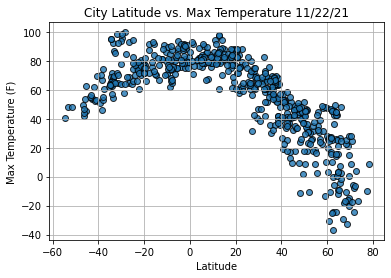

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.jpg")

# Show plot.
plt.show()

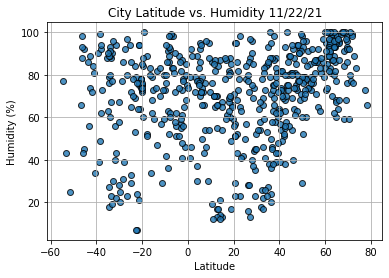

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.jpg")

# Show plot.
plt.show()

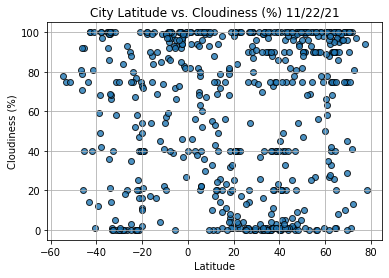

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.jpg")

# Show plot.
plt.show()

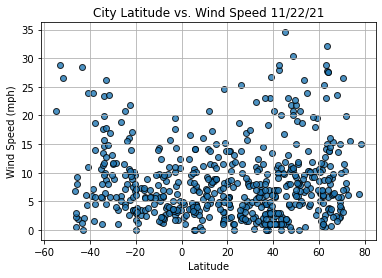

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.jpg")

# Show plot.
plt.show()